# **Intro ML Week 2.1 - KNN**
---
**KNN From Scratch**

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 16})

## **Load Data**
---

In [ ]:
# Load the data.
fname = "2.1-data_train.csv"
data_train = pd.read_csv(fname)

data_train.head()

,x_1,x_2,y
0,0.189645,-27.017739,0
1,0.692067,-9.033156,0
2,-1.003673,-30.560446,0
3,0.149332,-51.732407,0
4,0.132216,-13.741323,0


In [ ]:
len(data_train)

40

In [ ]:
data_test = {"x_1": [0.5],
             "x_2": [29.0]}

data_test = pd.DataFrame(data_test)
data_test

,x_1,x_2
0,0.5,29.0


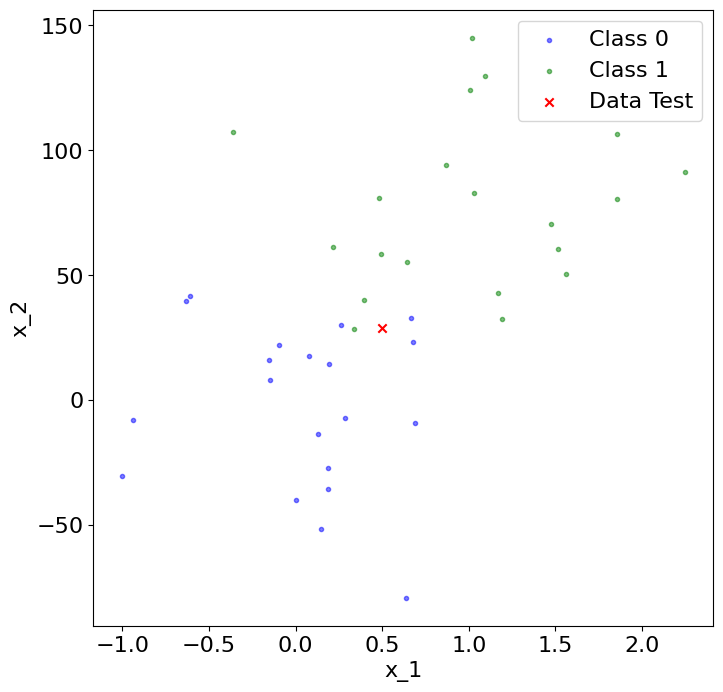

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c='r', marker='x')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
plt.legend()
plt.show()

## **KNN Algorithm**
---

### **1. Define the Distance Function**
---
- Define the `calculate_distance` function.
- It receives 3 arguments:
    1. `a`: the first observation.
    2. `b`: the second observation.
    3. `p`: the power of Minkowski Distance:

$p = 1$ represents Manhattan Distance

$p = 2$ represents Euclidean Distance (**default**)

- It returns the distance of `a` and `b`.

In [ ]:
# Function to calculate distance.
def calculate_distance(a, b, p=2):
    """
    Calculate the Euclidean distance between two observations.
    """
    # Initialization.
    distance = 0

    # Calculate the distance.
    for i in a.index:
        distance += abs(a[i] - b[i]) ** p
    distance = distance ** (1 / p)

    return distance

In [ ]:
# Test the function
a = pd.Series([1, 2])
b = pd.Series([3, 2])

print(f"Distance between a and b : {calculate_distance(a, b)}")

Distance between a and b : 2.0


In [ ]:
# Test the function.
a = pd.Series([1, 2])
b = pd.Series([1, 2])

print(f"Distance between a and b : {calculate_distance(a, b)}")

Distance between a and b : 0.0


In [ ]:
# Test the function.
a = pd.Series([1, 2])
b = pd.Series([1.5, 1000])

print(f"Distance between a and b : {calculate_distance(a, b)}")

Distance between a and b : 998.0001252504932


### **2. Define the Scaler Function**
---
- Define the `scale_data` function.
- It receives 2 arguments:
    1. `data_train`
    2. `data_test`

- Inside the function we will:
    1. Calculate the mean and std of `data_train`.
    2. Scale the data using the formula:
$$X_{scaled} = \frac{(x - \bar{x})}{\sigma}$$

In [ ]:
# Function to scale the data.
def scale_data(data_train, data_test):
    """
    Scale the data.
    """
    # Calculate the mean & variance of each observation.
    mean_train = np.mean(data_train, axis=0)
    std_train = np.std(data_train, axis=0)

    # Scale the data.
    data_train_scaled = (data_train - mean_train) / std_train
    data_test_scaled = (data_test - mean_train) / std_train

    return data_train_scaled, data_test_scaled

### **3. Define the KNN Classifier Function**
---
- Define the `knn_classifier` function.
- It receives 6 arguments:
    1. `X_train`
    2. `y_train`
    3. `k`: The number of closest observation.
    4. `X_test`
    5. `scale`: Whether to scale the data or not.
    6. `distance_func`: The type of distance.
- It returns 2 things:
    1. `majority_vote`: The prediction results.
    2. `neighbors_idx`: The index of nearest neighbors.
- Do experimentation when $k=3$ and $k=5$

In [ ]:
def knn_classifier(X_train, y_train, k, X_test, scale, distance_func):
    """
    The k-NN based Classifier.
    """
    # Initialization.
    n = len(X_train)         # The number of observation.
    list_dist = np.zeros(n)  # The list of distance.

    # Scale the data, if scale=True.
    if scale:
        X_train, X_test = scale_data(data_train = X_train,
                                     data_test = X_test)

    # Calculate distance from the target to all observations.
    for i in X_train.index:
        first = X_train.loc[i]
        second = X_test

        if distance_func == "manhattan":
            jarak_ = calculate_distance(first, second, p=1)
        elif distance_func == "euclidean":
            jarak_ = calculate_distance(first, second, p=2)

        list_dist[i] = jarak_

    # Find the k-nearest neighbors.
    neighbors_idx = list(np.argsort(list_dist)[:k])
    X_neighbors = X_train.loc[neighbors_idx]
    y_neighbors = y_train.loc[neighbors_idx]

    # Prediction: Majority Vote
    majority_vote = y_neighbors.value_counts(normalize=True).index[0]

    return majority_vote, neighbors_idx

### **4. Experimentation**
---

#### **Experiment 1**

When $k = 3$, `distance_func = "euclidean"`, `scale = False`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 3,
                                            X_test = data_test,
                                            scale = False,
                                            distance_func = "euclidean")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,1


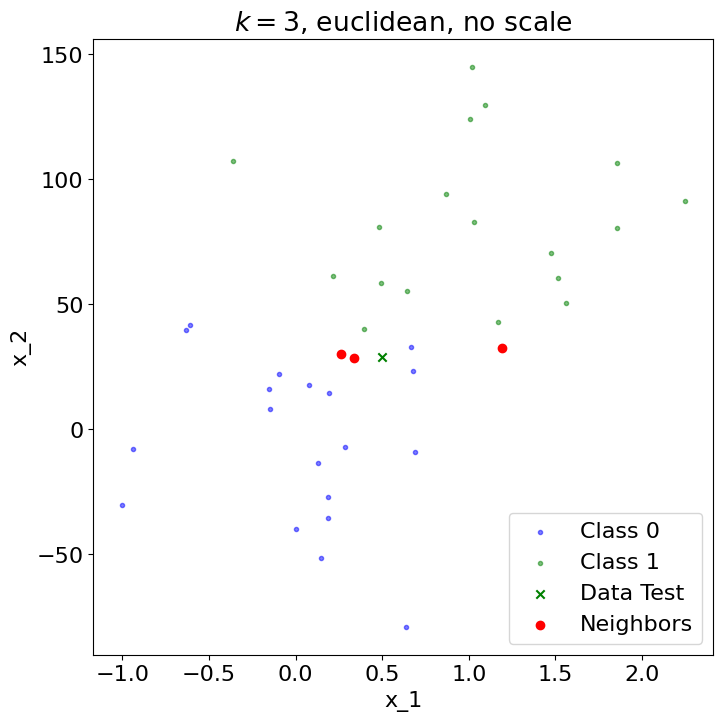

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=3$, euclidean, no scale")

plt.legend()
plt.show()

#### **Experiment 2**

When $k = 3$, `distance_func = "euclidean"`, `scale = True`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 3,
                                            X_test = data_test,
                                            scale = True,
                                            distance_func = "euclidean")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,1


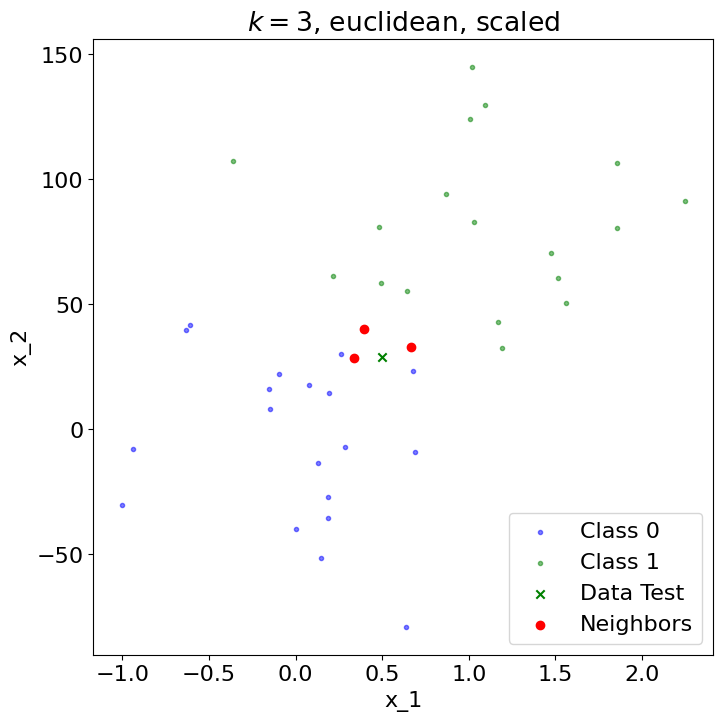

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=3$, euclidean, scaled")

plt.legend()
plt.show()

#### **Experiment 3**

When $k = 3$, `distance_func = "manhattan"`, `scale = False`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 3,
                                            X_test = data_test,
                                            scale = False,
                                            distance_func = "manhattan")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


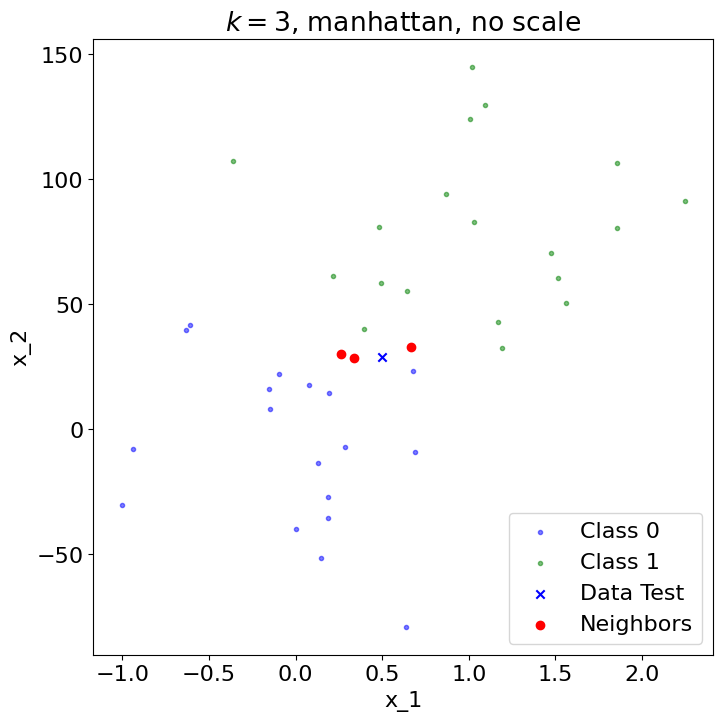

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=3$, manhattan, no scale")

plt.legend()
plt.show()

#### **Experiment 4**

When $k = 3$, `distance_func = "manhattan"`, `scale = True`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 3,
                                            X_test = data_test,
                                            scale = True,
                                            distance_func = "manhattan")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


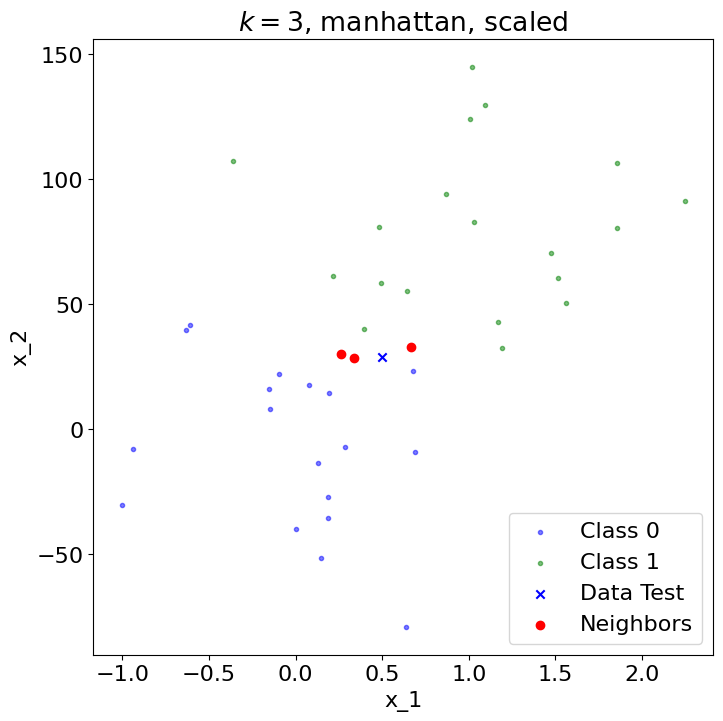

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=3$, manhattan, scaled")

plt.legend()
plt.show()

#### **Experiment 5**

When $k = 5$, `distance_func = "euclidean"`, `scale = False`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 5,
                                            X_test = data_test,
                                            scale = False,
                                            distance_func = "euclidean")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


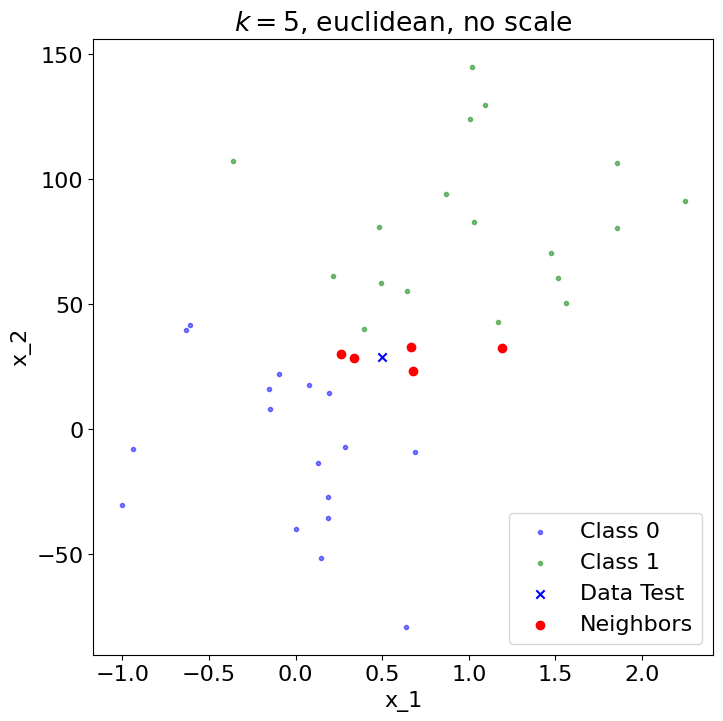

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=5$, euclidean, no scale")

plt.legend()
plt.show()

#### **Experiment 6**

When $k = 5$, `distance_func = "euclidean"`, `scale = True`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 5,
                                            X_test = data_test,
                                            scale = True,
                                            distance_func = "euclidean")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


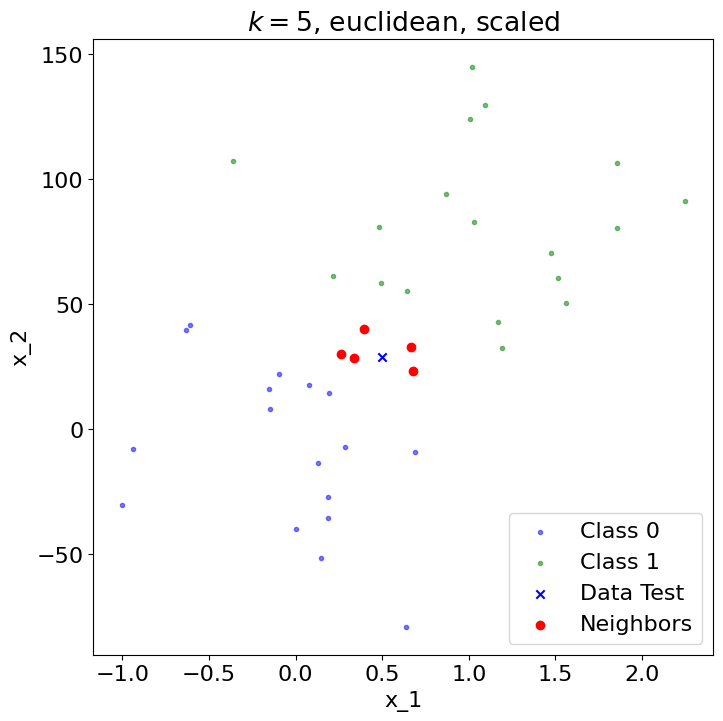

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=5$, euclidean, scaled")

plt.legend()
plt.show()

#### **Experiment 7**

When $k = 5$, `distance_func = "manhattan"`, `scale = False`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 5,
                                            X_test = data_test,
                                            scale = False,
                                            distance_func = "manhattan")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


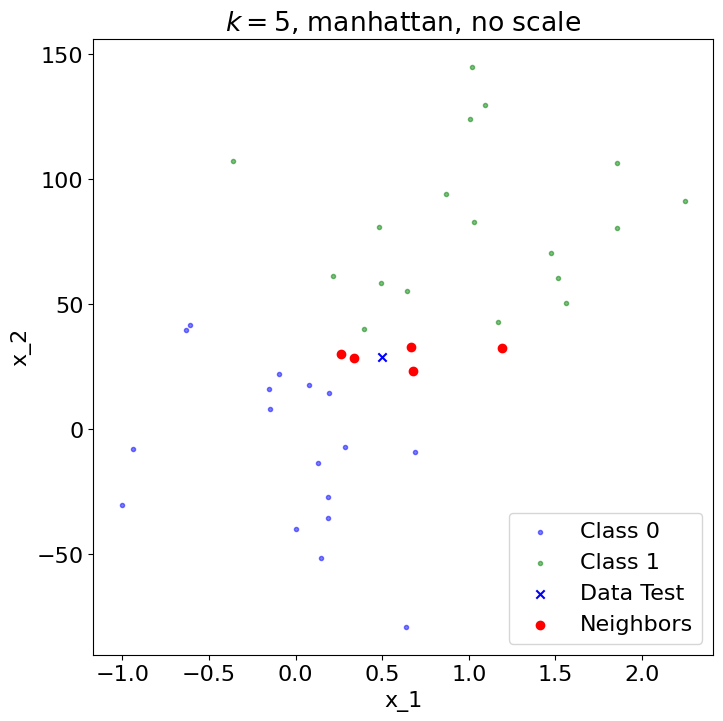

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=5$, manhattan, no scale")

plt.legend()
plt.show()

#### **Experiment 8**

When $k = 5$, `distance_func = "manhattan"`, `scale = True`

In [ ]:
# Test the function.
y_test_pred, neighbors_idx = knn_classifier(X_train = data_train[["x_1", "x_2"]],
                                            y_train = data_train["y"],
                                            k = 5,
                                            X_test = data_test,
                                            scale = True,
                                            distance_func = "manhattan")

data_test["y"] = y_test_pred
data_test

,x_1,x_2,y
0,0.5,29.0,0


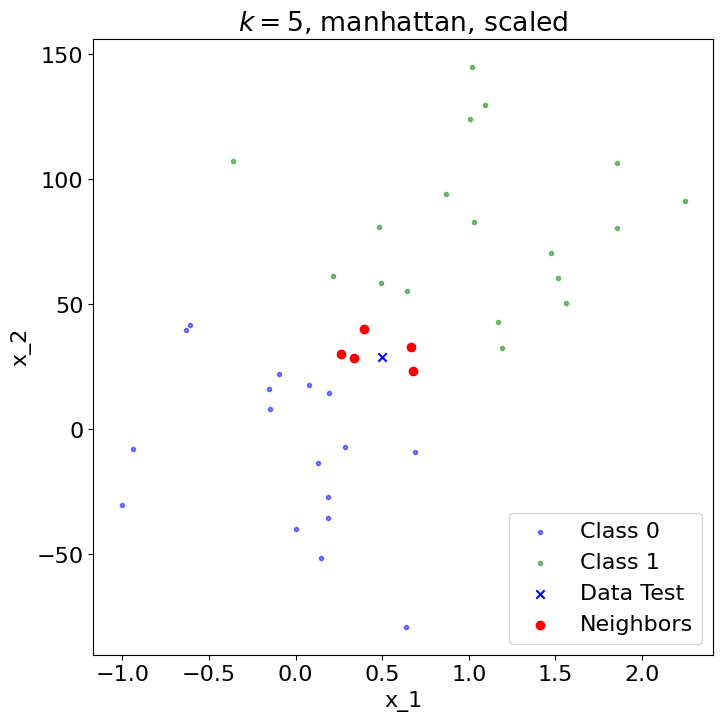

In [ ]:
# Plot the data.
fig, ax = plt.subplots(figsize=(8,8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"],
           label="Class 0", alpha=0.5,
           c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"],
           label="Class 1", alpha=0.5,
           c='g', marker='.')

# Display the test data.
if data_test["y"][0] == 0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"],
           label="Data Test", c=color_test, marker='x')

# Display the neighbors.
ax.scatter(data_train["x_1"].loc[neighbors_idx],
           data_train["x_2"].loc[neighbors_idx],
           label="Neighbors", c = 'r', marker='o')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_title("$k=5$, manhattan, scaled")

plt.legend()
plt.show()